# PL: Ceny Złota
# ENG: GOLD PRICES

In [13]:
import pandas as pd
import numpy as np
import datetime as dt
import pyodbc
import quandl
import matplotlib.pyplot as plt
import math as math
import os 
%matplotlib inline

In [14]:
#Opcje wyswietlania wyników biblioteki pandas
#Display options
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

In [15]:
#Pobieranie danych ze strony quandl.com przy pomocy kluczu API
#Dowlading data from quandl.com with API key
GoldPrice = quandl.get("LBMA/GOLD", authtoken="jJLD2gkVUNrszRRebz2U",start_date = "2010-01-01")
GoldPrice.tail()


USD (AM)  USD (PM)  GBP (AM)  GBP (PM)  EURO (AM)  EURO (PM)
Date                                                                    
2020-05-01   1673.05   1686.25   1332.08   1347.15    1523.14    1536.68
2020-05-04   1703.70   1709.10   1371.14   1374.63    1558.72    1563.83
2020-05-05   1696.30   1699.55   1363.83   1363.72    1566.36    1562.91
2020-05-06   1698.90   1691.50   1373.56   1366.73    1574.71    1564.13
2020-05-07   1688.65   1704.05   1366.29   1387.78    1565.21    1582.38

In [16]:
#Zmienianie nazwy kolumn
#Rename columns
GoldPrice = GoldPrice.rename(columns={'USD (PM)': 'USD'})

#Usuwanie zbędnych kolumn
#Deleting other columns
GoldPrice = GoldPrice.iloc[: , [1]].copy() 
GoldPrice.dropna(subset = ["USD"], inplace=True)
GoldPrice.tail()



USD
Date               
2020-05-01  1686.25
2020-05-04  1709.10
2020-05-05  1699.55
2020-05-06  1691.50
2020-05-07  1704.05

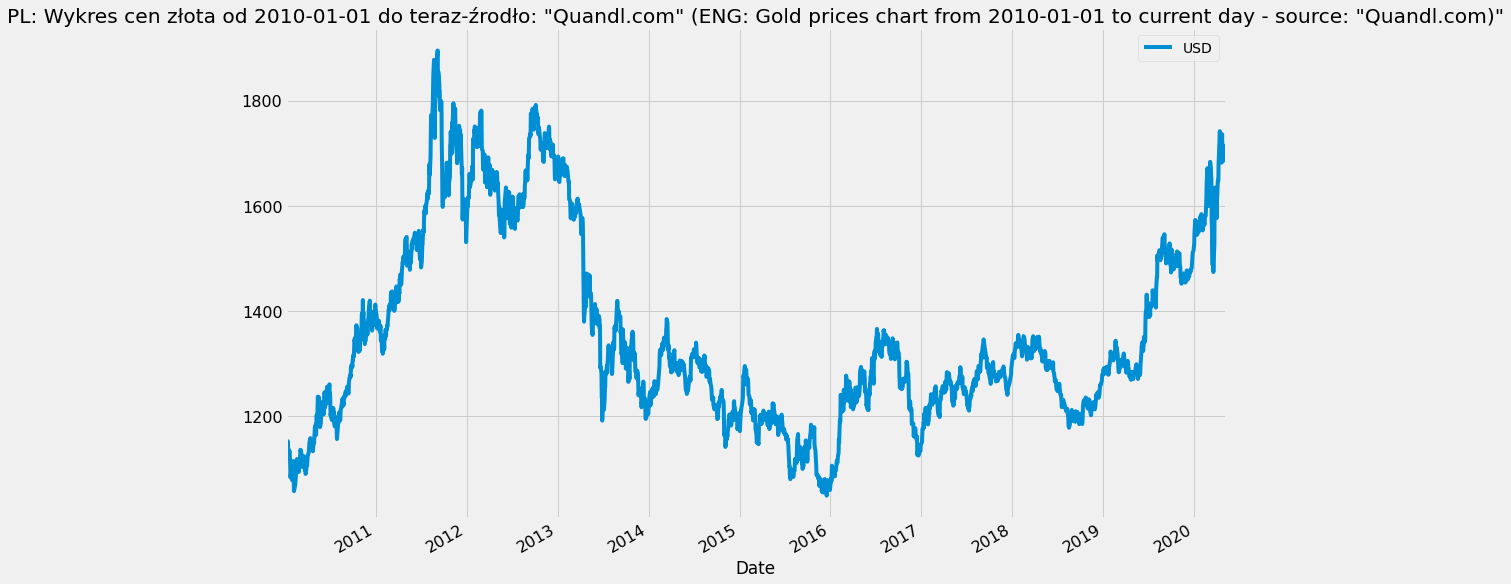

In [17]:
#Wyswietlanie danych na wykresie przy pomocy biblioteki plotly.express
#Displaying data in graph with plotly.express
plt.style.use('fivethirtyeight')
GoldPrice.plot(title= "PL: Wykres cen złota od 2010-01-01 do teraz-źrodło: \"Quandl.com\""+" (ENG: Gold prices chart from 2010-01-01 to current day - source: \"Quandl.com)\"",
            figsize=(15,10),grid=True,fontsize=16)

# PL: Przewidywanie Cen Złota przy użyciu Prophet
# ENG: Predictions Gold Prices with Prophet

In [18]:
#Resetowanie indexu
#Reset index
df = GoldPrice.reset_index()

#Zmiana nazwy kolumn dla biblioteki prophet
#Rename columns for prophet library
df = df.rename(columns={'Date': 'ds', 'USD': 'y'})

#Wyswietlanie ramki danych df
#Display Data Frame df
df.head()

ds        y
0 2010-01-04  1121.50
1 2010-01-05  1123.25
2 2010-01-06  1130.00
3 2010-01-07  1130.25
4 2010-01-08  1126.75

In [19]:
#Importowanie biblioteki Prophet
#Import Prophet library
from fbprophet import Prophet

#Inicjowanie nowego objektu Prophet
#Instantiating a new Prophet object
m = Prophet(daily_seasonality=True)

#Wywołanie metody dopasowania obiektu i wprowadzenie jej w ramke danych df
#Call object's fit method and pass in the historical dataframe
m.fit(df)

In [20]:
#Dodanie przyszłych dat do kolumny "ds"
#Extend the "ds" column with forecast
future = m.make_future_dataframe(freq='D',periods=365)
future.tail()

ds
2955 2021-05-03
2956 2021-05-04
2957 2021-05-05
2958 2021-05-06
2959 2021-05-07

In [21]:
#Przypisane przewidywanych danych
#Assign predicted values
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2955 2021-05-03  1770.846031  1502.679055  2016.070312
2956 2021-05-04  1770.251604  1494.009626  2023.093948
2957 2021-05-05  1768.579614  1504.521396  2016.589080
2958 2021-05-06  1767.322943  1502.185591  2015.717059
2959 2021-05-07  1765.774964  1482.491896  2028.434781

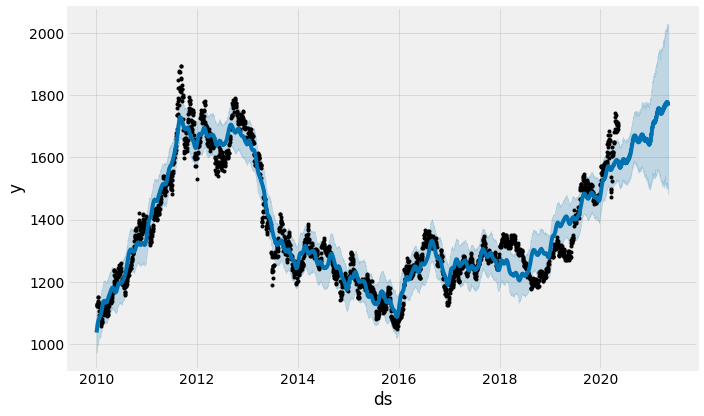

In [22]:
#Wyswietlanie grafu z przewidywanymi wartosciami 
#Show a plot with the forecast
fig1 = m.plot(forecast)

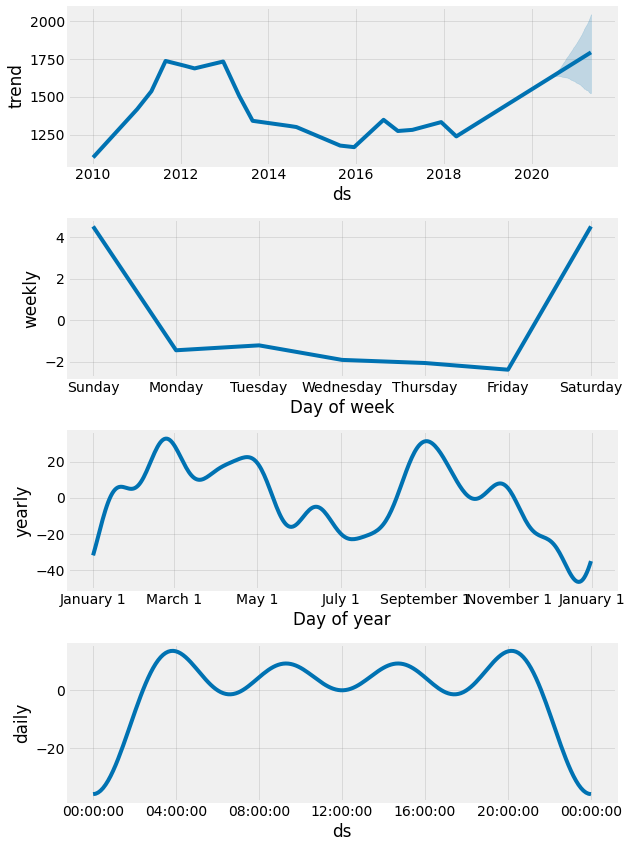

In [23]:
#Wyswietlanie grafu z przewidywanymi wartosciami 
#Show a plot with the forecast
fig2 = m.plot_components(forecast)

In [24]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

#Dodanie lini trendu to wykresu
#Add trendline to plot
fig = plot_plotly(m, forecast,trend=True)

indicator="Gold"

#Dodanie lini trendu to wykresu
#Add trendline to plot
fig.update_layout(
    title=indicator + " - ceny od 2010 do teraz, źrodło:\"Quandl.com\"" +'<br>'+ indicator+" price from 2010-current, source:\"Quandl.com\"", title_x=0.5,
    xaxis_title="Data (Date)",
    yaxis_title="Cena (Price)",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#242151"
    )
)
py.iplot(fig)

In [25]:
#Złączanie dwóch ramek danych 
#Merge two Data Frames (imported from .csv file and forecast) on date column ('ds')
df2 = df.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],sort=True,on=['ds'],how="outer")

#Zmiana nazwy  kolumn
#Rename the columns title
df2 = df2.rename(columns={'ds': 'Date', 'y': 'Index','yhat': 'Forecast',
                          'yhat_lower': 'Forecast_(lower)','yhat_upper': 'Forecast_(upper)'})

#Wyswietlanie pierwszych pozycji w ramce danych
#Display header
df2.tail(15)

Date  Index     Forecast  Forecast_(lower)  Forecast_(upper)
2945 2021-04-23    NaN  1770.337101       1507.360369       2005.070114
2946 2021-04-24    NaN  1777.719947       1520.222472       2014.589075
2947 2021-04-25    NaN  1778.129069       1508.088799       2005.598951
2948 2021-04-26    NaN  1772.484210       1517.050357       2026.947865
2949 2021-04-27    NaN  1772.908032       1500.411677       2024.021385
2950 2021-04-28    NaN  1772.269214       1512.001441       2023.463031
2951 2021-04-29    NaN  1772.041140       1499.441283       2022.163176
2952 2021-04-30    NaN  1771.496504       1507.460092       2030.187555
2953 2021-05-01    NaN  1778.004235       1497.792700       2022.017103
2954 2021-05-02    NaN  1777.476382       1508.267772       2027.831625
2955 2021-05-03    NaN  1770.846031       1502.679055       2016.070312
2956 2021-05-04    NaN  1770.251604       1494.009626       2023.093948
2957 2021-05-05    NaN  1768.579614       1504.521396       2016.589080
2958 2021-05-06    NaN  1767.322943       1502.185591       2015.717059
2959 2021-05-07    NaN  1765.774964       1482.491896       2028.434781

In [26]:
#Obliczanie średniej dla kazdej kolumny
#Calculation of mean for every column
meanIndex = df2['Index'].mean()
meanForecast = df2['Forecast'].mean()
meanForecastLower = df2['Forecast_(lower)'].mean()
meanForecastUpper = df2['Forecast_(upper)'].mean()

#Słownik dla wartosci średnich
#Dictionary with mean values
meanDict = ({'Index': meanIndex, 'Forecast': meanForecast,
            'Forecast_(Lower)': meanForecastLower, 'Forecast_(Upper)': meanForecastUpper})

#Wyswietlanie średnich wartości
#Display mean
print('Mean: ')
meanDict

Mean: 


{'Index': 1355.9866473988418,
 'Forecast': 1394.346550243865,
 'Forecast_(Lower)': 1320.9621284316083,
 'Forecast_(Upper)': 1466.660777660964}

In [27]:
#Maksymalne wartosci
#Max values
maxIndex = df2['Index'].max()
maxForecast = df2['Forecast'].max()
maxForecastLower = df2['Forecast_(lower)'].max()
maxForecastUpper = df2['Forecast_(upper)'].max()

#Słownik dla wartosci maksymalnych
#Dictionary with max values
maxDict = ({'Index': maxIndex, 'Forecast': maxForecast,
            'Forecast_(Lower)': maxForecastLower, 'Forecast_(Upper)': maxForecastUpper})

#Wyswietlanie maksymalnych wartości
#Display max
print('Max value: ')
maxDict

Max value: 


{'Index': 1895.0,
 'Forecast': 1778.1290694764275,
 'Forecast_(Lower)': 1666.159555532968,
 'Forecast_(Upper)': 2030.1875548771568}

In [28]:
#Minimalne wartosci
#Min values
minIndex = df2['Index'].min()
minForecast = df2['Forecast'].min()
minForecastLower = df2['Forecast_(lower)'].min()
minForecastUpper = df2['Forecast_(upper)'].min()

#Słownik z wartosciami minimalnymi
#Dictionary with min values
minDict = ({'Index': minIndex, 'Forecast': minForecast,
            'Forecast_(Lower)': minForecastLower, 'Forecast_(Upper)': minForecastUpper})
#Wyswietlanie minimalnych wartości
#Display min
print('Min: ')
minDict

Min: 


{'Index': 1049.4,
 'Forecast': 1037.7188625539393,
 'Forecast_(Lower)': 972.6076484427799,
 'Forecast_(Upper)': 1102.359342621035}

In [29]:
#Wyswietlanie ile rekordow znajduje się powyzej lub ponizej przewidywanej wartosci akcji
#How many rows is above or below average predicted value
indexAboveMeanForecast = df2["Index"].between(meanForecast,maxIndex)
indexBelowMeanForecast = df2["Index"].between(minIndex,meanForecast)

In [30]:
#Wyswietlanie kiedy wystapila najmiejsza wartość
#Smallest value date
minIndex = df2.nsmallest(n=1,columns='Index')
minIndexValue = minIndex['Index'].loc[minIndex.index]
minIndexDate = minIndex['Date'].loc[minIndex.index].to_string(index=False)

#Wyswietlanie kiedy wystapila największa wartość
#Largest value date
maxIndex = df2.nlargest(n=1,columns='Index')
maxIndexValue = maxIndex['Index'].loc[maxIndex.index]
maxIndexDate = maxIndex['Date'].loc[maxIndex.index].to_string(index=False)

#Wyswietlanie kiedy wystapila najmiejsza przewidywana wartość
#Smallest predicted value dat
minForecast = df2.nsmallest(n=1,columns='Forecast')
minForecastValue = minForecast['Forecast'].loc[minForecast.index]
minForecastDate = minForecast['Date'].loc[minForecast.index].to_string(index=False)

#Wyswietlanie kiedy wystapila największa przewidywana wartość
#Largest predicted value date
maxForecast = df2.nlargest(n=1,columns='Forecast')
maxForecastValue = maxForecast['Forecast'].loc[maxForecast.index]
maxForecastDate = maxForecast['Date'].loc[maxForecast.index].to_string(index=False)
maxForecastDate

'2021-04-25'

# PL: Podsumowanie
# ENG: SUMARRY

In [31]:
print('Średnia wartosc wynosi %f ,a średnia przewidywana wartosc wynosi %f .' % (meanIndex, meanForecast))
print('Wystąpiło %d rekordów (wartości) powyżej przewidywanej wartości.' % len(df2[indexAboveMeanForecast]))
print('Wystąpiło %d rekordów (wartości) poniżej przewidywanej wartości.' % len(df2[indexBelowMeanForecast]))
print('Najmiejsza wartość wynosi %f i miala miejsce %s .' % (minIndexValue, minIndexDate))
print('Największa wartośc wynosi %f i miała miejsce %s .' % (maxIndexValue, maxIndexDate))
print('Najmiejsza przewidywana wartość wynosi %f i będzie miala miejsce %s .' % (minForecastValue, minForecastDate))
print('Największa przewidywana wartość wynosi %f i będzie miala miejsce %s .' % (maxForecastValue, maxForecastDate))

Średnia wartosc wynosi 1355.986647 ,a średnia przewidywana wartosc wynosi 1394.346550 .
Wystąpiło 795 rekordów (wartości) powyżej przewidywanej wartości.
Wystąpiło 1800 rekordów (wartości) poniżej przewidywanej wartości.
Najmiejsza wartość wynosi 1049.400000 i miala miejsce 2015-12-17 .
Największa wartośc wynosi 1895.000000 i miała miejsce 2011-09-05 .
Najmiejsza przewidywana wartość wynosi 1037.718863 i będzie miala miejsce 2010-01-04 .
Największa przewidywana wartość wynosi 1778.129069 i będzie miala miejsce 2021-04-25 .


In [32]:
print('The average index value is %f and the average predicted value is %f .' % (meanIndex, meanForecast))
print('There are %d rows (values) above average predicted value.' % len(df2[indexAboveMeanForecast]))
print('There are %d rows (values) below average predicted value.' % len(df2[indexBelowMeanForecast]))
print('The smallest index value is %f on %s .' % (minIndexValue, minIndexDate))
print('The largest index value is %f on %s .' % (maxIndexValue, maxIndexDate))
print('The smallest predicted value is %f on %s .' % (minForecastValue, minForecastDate))
print('The largest predicted value is %f on %s .' % (maxForecastValue, maxForecastDate))

The average index value is 1355.986647 and the average predicted value is 1394.346550 .
There are 795 rows (values) above average predicted value.
There are 1800 rows (values) below average predicted value.
The smallest index value is 1049.400000 on 2015-12-17 .
The largest index value is 1895.000000 on 2011-09-05 .
The smallest predicted value is 1037.718863 on 2010-01-04 .
The largest predicted value is 1778.129069 on 2021-04-25 .


# PL: Zapisywanie ramki danych do bazy danych
# ENG: Saving DF with predictions to DB

In [33]:
#Sciezka pod ktorym folderem zapisywana jest baza danych SQLlite
#Destination folder
os.chdir("C:/Users/Lukasz/Documents/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data")

import sqlite3

In [34]:
#Nawiązanie połączenia z bazą danych SQLLite (predictions)
#Connecting with database
conn = sqlite3.connect('predictions.db')
c = conn.cursor()

In [35]:
#Tworzenie tabeli w bazie
# Creating a table
c.execute('CREATE TABLE IF NOT EXISTS '+indicator+' ([Date] date PRIMARY KEY, [Index] float, [Forecast] float, [Forecast_(lower)] float, [Forecast_(upper)] float)')
conn.commit()

In [36]:
#Zapisywanie ramki danych do bazy danych
# Saving data frame to database 
df2.to_sql(indicator, conn, if_exists='replace', index = False)

In [37]:
#Wyciąganie danych z bazy (w celu sprawdzenia poprawności kodu)
# Extracing records from database (just for a test)

c.execute('''  
SELECT * FROM '''+indicator+'''
          ''')
for row in c.fetchall():
    print (row)

('2010-01-04 00:00:00', 1121.5, 1037.7188625539393, 972.6076484427799, 1102.359342621035)
('2010-01-05 00:00:00', 1123.25, 1041.7203051541617, 979.407475056286, 1108.6380875565228)
('2010-01-06 00:00:00', 1130.0, 1044.7861835896247, 979.0463692876591, 1108.017819177082)
('2010-01-07 00:00:00', 1130.25, 1048.359906406316, 986.7316798342409, 1114.2859874853305)
('2010-01-08 00:00:00', 1126.75, 1051.6837271261525, 989.0420896687926, 1122.2831010524742)
('2010-01-11 00:00:00', 1153.0, 1062.737547289488, 999.7796152673378, 1126.8467990669046)
('2010-01-12 00:00:00', 1151.25, 1065.9816349849461, 996.8861063756492, 1137.2993176216846)
('2010-01-13 00:00:00', 1127.25, 1068.0725404682123, 1003.5363310608005, 1131.544746198544)
('2010-01-14 00:00:00', 1138.25, 1070.4797619878427, 1008.121734896494, 1138.7817874155483)
('2010-01-15 00:00:00', 1128.0, 1072.4758430439185, 1004.2560291546508, 1136.1237253087277)
('2010-01-18 00:00:00', 1134.5, 1078.9286257897227, 1008.8883388774215, 1140.87846115024

('2016-09-19 00:00:00', 1314.85, 1304.4886131073774, 1241.9995947179575, 1368.7704335783042)
('2016-09-20 00:00:00', 1313.8, 1302.7385423877874, 1233.5903845870653, 1369.0050547439328)
('2016-09-21 00:00:00', 1326.1, 1300.060726773949, 1236.8772044399605, 1366.8387965746783)
('2016-09-22 00:00:00', 1339.1, 1297.9472446436266, 1236.7866227612446, 1365.2015899532694)
('2016-09-23 00:00:00', 1338.65, 1295.6877208432238, 1232.59228011921, 1359.6681807404636)
('2016-09-26 00:00:00', 1340.5, 1291.0507500926162, 1223.9594589074982, 1355.9068241155228)
('2016-09-27 00:00:00', 1327.0, 1289.5448025752225, 1218.808508274991, 1358.558356382183)
('2016-09-28 00:00:00', 1322.5, 1287.1777200387442, 1222.8889752582697, 1354.355019869711)
('2016-09-29 00:00:00', 1318.1, 1285.4418945658633, 1214.0300882164352, 1353.50250631872)
('2016-09-30 00:00:00', 1322.5, 1283.6265929034626, 1222.3186539350281, 1353.2405546842394)
('2016-10-03 00:00:00', 1313.3, 1280.7042555184587, 1214.2947593489532, 1346.650847025